<a href="https://colab.research.google.com/github/gharis/Machine-Learning/blob/master/MALARIA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install kaggle

In [27]:
#upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gamithaharischandra","key":"9d6440f8fa9e160569743a9e687eec8a"}'}

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [29]:
#import the dataset we want to use for our project
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

cell-images-for-detecting-malaria.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip cell-images-for-detecting-malaria.zip

In [30]:
!pip install tensorflow-gpu==2.0.0-rc0

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
img_width = 64
img_height = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [35]:
train_data_generator = datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                                                   target_size=(img_width, img_height), 
                                                   class_mode='binary',
                                                   batch_size = 16,
                                                   subset = 'training')

Found 22048 images belonging to 2 classes.


In [37]:
validation_data_generator = datagen.flow_from_directory(directory='/content/cell_images/cell_images',
                                                   target_size=(img_width, img_height), 
                                                   class_mode='binary',
                                                   batch_size = 16,
                                                   subset = 'validation')

Found 5510 images belonging to 2 classes.


In [38]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
#CNN
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3 ), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3,), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)             

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [42]:
history = model.fit_generator(generator=train_data_generator,
                               steps_per_epoch = len(train_data_generator),
                               epochs =5,
                               validation_data = validation_data_generator,
                               validation_steps = len(validation_data_generator)
                               )

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 163s 118ms/step - loss: 0.4611 - accuracy: 0.7757 - val_loss: 0.2126 - val_accuracy: 0.9232
Epoch 2/5
1378/1378 [==============================] - 163s 119ms/step - loss: 0.2145 - accuracy: 0.9240 - val_loss: 0.1825 - val_accuracy: 0.9321
Epoch 3/5
1378/1378 [==============================] - 164s 119ms/step - loss: 0.1969 - accuracy: 0.9338 - val_loss: 0.1860 - val_accuracy: 0.9436
Epoch 4/5
1378/1378 [==============================] - 165s 120ms/step - loss: 0.1875 - accuracy: 0.9414 - val_loss: 0.1742 - val_accuracy: 0.9343
Epoch 5/5
1378/1378 [==============================] - 164s 119ms/step - loss: 0.1747 - accuracy: 0.9452 - val_loss: 0.1664 - val_accuracy: 0.9414


In [44]:
history.history

{'accuracy': [0.7757166, 0.9240294, 0.93378085, 0.9414006, 0.9451651],
 'loss': [0.46112471905432867,
  0.21450346664570175,
  0.1969061669838143,
  0.1874982105995189,
  0.17466536490246654],
 'val_accuracy': [0.92323047, 0.9321234, 0.94355714, 0.93430126, 0.9413793],
 'val_loss': [0.21264394719315613,
  0.1825155492062154,
  0.18604442753113698,
  0.17420197013171687,
  0.1664380873081045]}

In [0]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  #plot Accuracy
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

  #plot loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

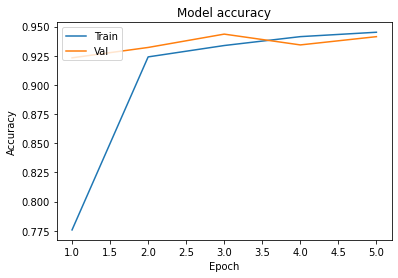

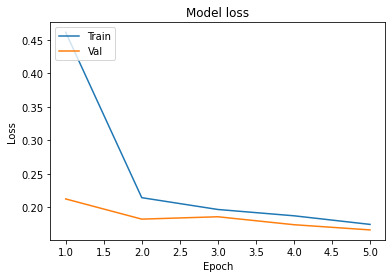

In [46]:
plot_learningCurve(history, 5)